# Subgradient projection method for basis pursuit

Consider the basis pursuit problem:
$$
\begin{aligned}
&\text{minimize } &&\|x\|_1 = \sum_{i=1}^n |x_i|,\\
&\text{subject to } && Ax=b.
\end{aligned}
$$
We assume that $A\in\mathbb{R}^{m\times n}$ has full row rank, $m<n$, $b\in \text{range }A \subseteq \mathbb{R}^m$.  A code snippet below generates a random instance of such a problem:

In [1]:
import numpy as np

def random_instance(m,n):
    A = np.random.rand(m,n)
    b = A.sum(axis=1)
    return (A,b)

We now provide a prototypical implementation of the subgradient projection algorithm for this problem:

In [2]:
from scipy.linalg import cho_factor, cho_solve

def subgradient(x):
    # subgradient of 1-norm
    return np.sign(x)

def project(y,A,b,AAT_fact):
    # Projection of y onto the affine manifold {x: Ax=b}
    return y-A.T@(cho_solve(AAT_fact, A@y-b))

def subgradient_method(x0,A,b):
    xk       = x0.copy()
    x_best   = xk.copy()
    f_best   = float('inf')
    f_history= []
    # we prefactorize AA^T, since we are solving this system
    # at every iteration
    AAT_fact = cho_factor(A@A.T)
    k_max    = 1000000
    k_print  = 10000
    x_diff   = 1.0E-06
    for k in range(k_max):
        # get a subgradient
        gk = subgradient(xk)
        # Since subradients are not necessarily descent directions,
        # we cannot use linesearch. Instead, we use the rule
        # where alpha_k->0 but sum(alpha_k)=infinity.
        alphak = 1.0/(1+k)
        # Project the step onto the feasible set
        xk1 = project(xk-alphak*gk,A,b,AAT_fact)
        # Compute the new objective and possibly update
        # the best so far
        fk1 = np.linalg.norm(xk1,ord=1)
        f_history.append(fk1)
        if fk1 < f_best:
            x_best = xk1.copy()
            f_best = fk1
        # Print messages every k_print iterations
        if k%k_print == 0:
            print("Iter: %6d, fk: %e" % (k,fk1))
        # We stop when the method stops making progress.
        # This is not a good practice; one should instead 
        # check the optimality conditions in general.
        if np.linalg.norm(xk-xk1,np.inf) < x_diff:
            break
        xk = xk1
    return x_best,k,f_history

Let us test it on some small problems.

In [3]:
A,b=random_instance(5,20)

In [4]:
x,k,f_history =subgradient_method(np.zeros(A.shape[1]),A,b)
f   = np.linalg.norm(x,ord=1)
print("Iter: %6d, f : %e" % (k,f))

Iter:      0, fk: 1.903090e+01
Iter:  10000, fk: 1.646753e+01
Iter:  20000, fk: 1.642056e+01
Iter:  30000, fk: 1.639310e+01
Iter:  40000, fk: 1.637594e+01
Iter:  50000, fk: 1.636577e+01
Iter:  60000, fk: 1.635744e+01
Iter:  70000, fk: 1.635043e+01
Iter:  80000, fk: 1.634433e+01
Iter:  90000, fk: 1.633896e+01
Iter: 100000, fk: 1.633415e+01
Iter: 110000, fk: 1.632980e+01
Iter: 120000, fk: 1.632583e+01
Iter: 130000, fk: 1.632218e+01
Iter: 140000, fk: 1.631880e+01
Iter: 150000, fk: 1.631566e+01
Iter: 160000, fk: 1.631271e+01
Iter: 170000, fk: 1.630995e+01
Iter: 180000, fk: 1.630733e+01
Iter: 190000, fk: 1.630487e+01
Iter: 200000, fk: 1.630253e+01
Iter: 210000, fk: 1.630031e+01
Iter: 220000, fk: 1.629819e+01
Iter: 230000, fk: 1.629616e+01
Iter: 240000, fk: 1.629422e+01
Iter: 250000, fk: 1.629235e+01
Iter: 260000, fk: 1.629057e+01
Iter: 270000, fk: 1.628885e+01
Iter: 280000, fk: 1.628719e+01
Iter: 290000, fk: 1.628559e+01
Iter: 300000, fk: 1.628404e+01
Iter: 310000, fk: 1.628255e+01
Iter: 32

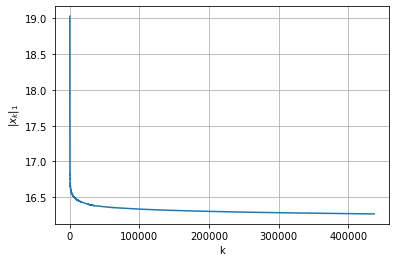

In [5]:
import matplotlib.pyplot as plt

plt.plot(f_history)
plt.xlabel('k')
plt.ylabel(r'$\|x_k\|_1$')
plt.grid('on')